<a href="https://colab.research.google.com/github/sheom5133/cs231n/blob/main/%EC%9C%A0%EB%AA%85%ED%99%94%EA%B0%80%EC%8A%A4%ED%83%80%EC%9D%BC%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-hub pillow

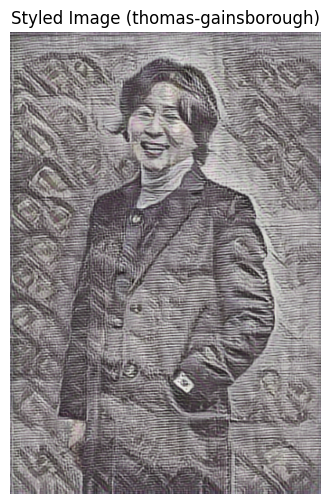

✅ 변환 완료: stylized_output.jpg


In [ ]:
# @title 기본 제목 텍스트
# colab_cell_01
# !pip install tensorflow tensorflow-hub pillow

import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

def load_img(path, max_dim=512):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)  # 채널을 명시적으로 설정
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = tf.expand_dims(img, axis=0)  # 배치 차원 추가
    return img


# thomas-gainsborough(토머스 게인즈버) 스타일 이미지 URL (미리 준비하시거나 업로드)

content_path = 'input.jpg'
style_path = 'thomas-gainsborough.jpg'

content = load_img(content_path)
style = load_img(style_path)


# TensorFlow Hub 임의 스타일 변환 모델 로드
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized = hub_model(tf.constant(content), tf.constant(style))[0]

# 결과 저장
import matplotlib.pyplot as plt
# colab_cell_05: 결과 저장 및 화면에 보여주기
out_img = stylized[0].numpy()
plt.figure(figsize=(6,6))
plt.imshow(np.clip(out_img, 0.0, 1.0))
plt.axis('off')
plt.title('Styled Image (thomas-gainsborough)')
plt.show()


plt.imsave('stylized_output.jpg', stylized[0].numpy())

print("✅ 변환 완료: stylized_output.jpg")
